## Análise de dados - Portal da Transparência

Importando as bibliotecas necessárias.




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Lendo a base de dados.

In [ ]:
caminho_dados = '/content/drive/MyDrive/Colab Notebooks/Asimov - Python para dados/2023_Viagem.csv'
caminho_saida_tabela = '/content/drive/MyDrive/Colab Notebooks/Asimov - Python para dados/analise_final.xlsx'
caminho_saida_grafico = '/content/drive/MyDrive/Colab Notebooks/Asimov - Python para dados/grafico.png'

df = pd.read_csv(caminho_dados, encoding='Windows-1252', sep=';', decimal=',')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

Ajustando valores nulos na coluna de cargo.

In [ ]:
df['Cargo'] = df['Cargo'].fillna('NÃO INFORMADO')

Criando nova coluna de despesas.

In [ ]:
df['Despesas'] = df['Valor diárias'] + df['Valor passagens'] + df['Valor outros gastos']

Convertendo colunas de datas.

In [ ]:
df['Período - Data de início'] = pd.to_datetime(df['Período - Data de início'], format='%d/%m/%Y')
df['Período - Data de fim'] = pd.to_datetime(df['Período - Data de fim'], format='%d/%m/%Y')

Criando novas colunas de data.

In [ ]:
df['Mês da viagem'] = (df['Período - Data de início']).dt.month_name()
df['Dias de viagem'] = (df['Período - Data de fim'] - df['Período - Data de início']).dt.days

Criando tabela consildada.

In [ ]:
df_consolidado = (
    df
  .groupby('Cargo')
  .agg(
      despesa_media=('Despesas', 'mean'),
      duracao_media=('Dias de viagem', 'mean'),
      despesas_totais=('Despesas', 'sum'),
      destino_mais_freq=('Destinos', pd.Series.mode),
      n_viagens=('Cargo', 'count')
      )
  .reset_index()
  )

# Filtrando tabela consolidada por cargos relevantes (> 1% das viagens)
cargos = (df['Cargo'].value_counts(normalize=True) * 100).reset_index()
cargos_relevantes = cargos.loc[cargos['proportion'] > 1, 'Cargo']
filtro = df_consolidado['Cargo'].isin(cargos_relevantes)

# Tabela final - Consolidadda e filtrada
df_final = df_consolidado[filtro]

# Salvando a tabela final
df_final.to_excel(caminho_saida_tabela, index=False)

Gerando gráficos.

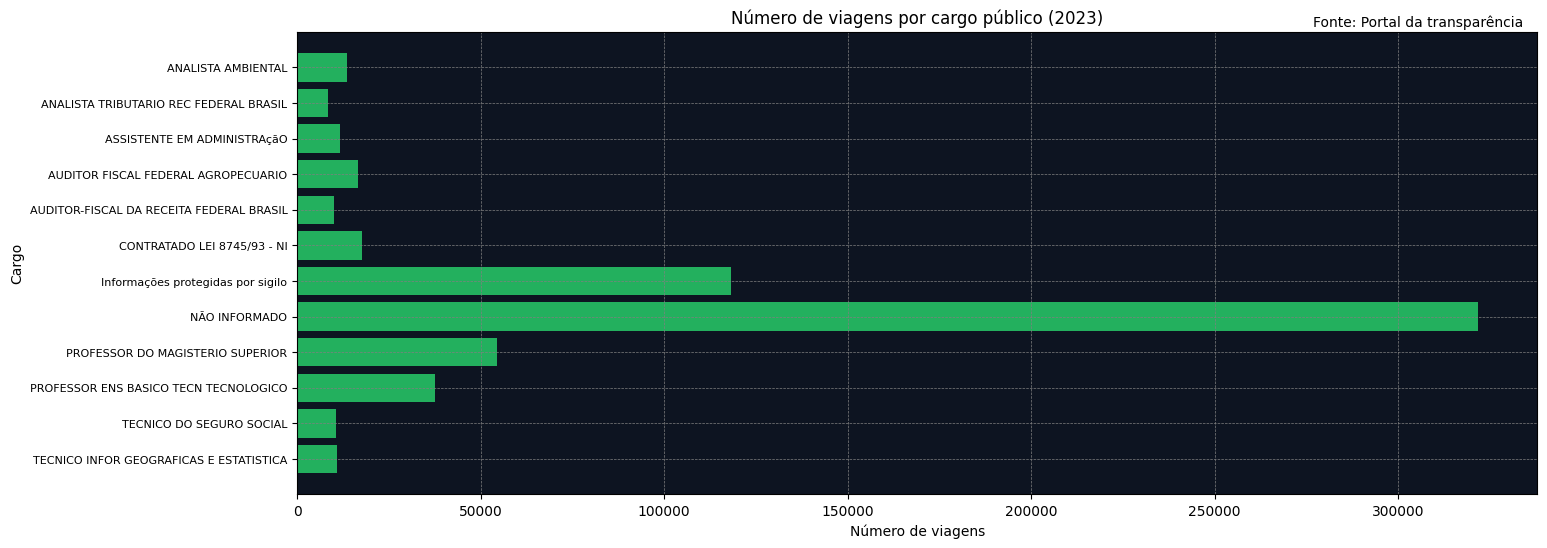

<Figure size 640x480 with 0 Axes>

In [ ]:
# Criando a figura
fig, graph = plt.subplots(figsize=(16, 6))

# Plotando o gráfico
graph.barh(df_final['Cargo'], df_final['n_viagens'], color='#23b05e')
graph.invert_yaxis()

# Ajustando o gráfico
graph.set_facecolor('#0d1421')
plt.xlabel('Número de viagens')
plt.ylabel('Cargo')
plt.title('Número de viagens por cargo público (2023)')
plt.yticks(fontsize=8)
plt.figtext(0.76, 0.89, 'Fonte: Portal da transparência')
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Exibindo o gráfico
plt.show()

# Salvando o gráfico
plt.savefig(caminho_saida_grafico, bbox_inches='tight')